<div style="text-align: right"> AE Simpson </div><br>

# Challenge: make your own regression model
> You've already gotten started by prepping the FBI:UCR Crime dataset in a previous assignment.<br>
Using this data, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

In [1]:
#Imports
import math
import warnings
import numpy as np
import pandas as pd

from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Plotting
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format


# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
crime_feats = pd.read_csv('crime_model_2013.csv')
crime_feats.head()

,city,population,Robbery,Murder,Propertycrime,Violent,Burglary,Motor_Theft,Assault
0,Adams Village,1861.000,0.000,0.000,12.000,0.000,2.000,0.000,0.000
1,Addison Town and Village,2577.000,0.000,0.000,24.000,3.000,3.000,1.000,3.000
2,Akron Village,2846.000,0.000,0.000,16.000,3.000,1.000,0.000,3.000
3,Albany,97956.000,227.000,8.000,4090.000,791.000,705.000,142.000,526.000
4,Albion Village,6388.000,4.000,0.000,223.000,23.000,53.000,5.000,16.000


In [3]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_feats['Propertycrime'].values.reshape(-1, 1)
#X = crime_feats[['population', 'Robbery', 'Murder', 'Violent', 'Burglary', 'Motor_Theft', 'Assault']]
linear_formula = 'Y ~ population+Robbery+Murder+Violent+Burglary+Motor_Theft+Assault'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime_feats).fit()


# Inspect the results.
print('\nCoefficients: \n', lm.params)
print('\nP-Values: \n', lm.pvalues)
print('\nR-squared: \n', lm.rsquared)


Coefficients: 
 Intercept     -22.637
population      0.010
Robbery       -14.213
Murder          3.989
Violent         7.833
Burglary        3.738
Motor_Theft     4.287
Assault        -7.304
dtype: float64

P-Values: 
 Intercept     0.017
population    0.000
Robbery       0.000
Murder        0.749
Violent       0.030
Burglary      0.000
Motor_Theft   0.001
Assault       0.057
dtype: float64

R-squared: 
 0.9334594976341679


The p-value for murder is greater than .05, so I'm going to drop it, and re-fit the model

In [4]:
linear_formula = 'Y ~ population+Robbery+Violent+Burglary+Motor_Theft+Assault'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime_feats).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     787.7
Date:                Sat, 22 Dec 2018   Prob (F-statistic):          6.50e-195
Time:                        10:27:54   Log-Likelihood:                -2169.5
No. Observations:                 344   AIC:                             4353.
Df Residuals:                     337   BIC:                             4380.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.5080      9.379     -2.400      0.017     -40.957      -4.059
population      0.0097      0.001     16.026      0.000       0.009       0.011
Robbery       -14.6963      3.213     -4.574      0.000     -21.017      -8.376
Violent         8.4244      3.077      2.738      0.007       2.372      14.476
Burglary        3.7315      0.178     20.926      0.000       3.381       4.082
Motor_Theft     4.2587      1.247      3.414      0.001       1.805       6.713
Assault        -7.9168      3.303     -2.397      0.017     -14.413      -1.421
==============================================================================
Omnibus:                       78.869   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              999.166
Skew:                           0.513   Prob(JB):                    1.08e-217
Kurtosis:                      11.286   Cond. No.                     3.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

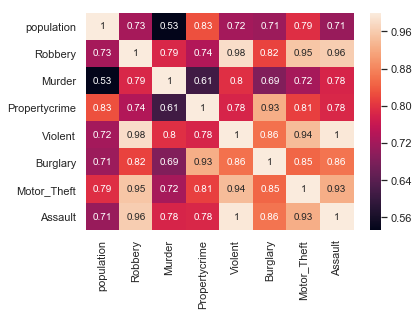

In [5]:
sns.heatmap(crime_feats.corr(), annot=True)
plt.show()

I'll remove assult because it's highly correlated to violent crimes, then robbery, and lastly motor vehicle theft.

In [9]:
linear_formula = 'Y ~ population+Robbery+Violent+Burglary+Motor_Theft'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=crime_feats).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     931.0
Date:                Sat, 22 Dec 2018   Prob (F-statistic):          3.49e-195
Time:                        10:28:57   Log-Likelihood:                -2172.4
No. Observations:                 344   AIC:                             4357.
Df Residuals:                     338   BIC:                             4380.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -21.9763      9.442     -2.327      0.021     -40.549      -3.403
population      0.0099      0.001     16.223      0.000       0.009       0.011
Robbery        -7.7396      1.389     -5.572      0.000     -10.472      -5.007
Violent         1.1375      0.479      2.373      0.018       0.195       2.080
Burglary        3.8814      0.168     23.080      0.000       3.551       4.212
Motor_Theft     3.7961      1.241      3.059      0.002       1.355       6.237
==============================================================================
Omnibus:                       71.860   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.849
Skew:                           0.484   Prob(JB):                    1.22e-164
Kurtosis:                      10.192   Cond. No.                     3.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Build Model

I used Stats Models to look at the parameters, but I will use Sklearn's Grid Search to actually train and cross validate the model.

In [6]:
#Sklearn

from sklearn.grid_search import GridSearchCV

# Instantiate and fit our model.
#regr = linear_model.LinearRegression()

parameters = {'normalize':[True,False]}

#Note for regression problems have to do different scoreing methods:
grid = GridSearchCV(regr, parameters, scoring='r2', cv=3, verbose=0)


#population, violent_crime, robbery, burglary, motor_theft, aggravated_assault
Y = crime_feats['Propertycrime'].values.reshape(-1, 1)
X = crime_feats[['population', 'Robbery', 'Violent', 'Burglary', 'Motor_Theft']]

#Fit the Data
grid.fit(X, Y)

/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='r2', verbose=0)

In [7]:
#Get the R2 score. 
print("Model r2: \n", grid.score(X, Y))

Model r2: 
 0.9323042129434027


### Now I'll test the model on new data (same year, different state).

Note: This dataset has already been cleaned and is ready for a model to be run

In [8]:
test_data = pd.read_csv('ill_test.csv')
test_data.head()

,city,property_crime,Population,Robbery,Murder,Violent,Burglary,Motor_Theft,Assult
0,Addison,640.000,37378.000,5.000,1.000,40.000,97.000,16.000,26.000
1,Albany,5.000,878.000,0.000,0.000,0.000,0.000,0.000,0.000
2,Albers,0.000,1187.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Albion,33.000,1975.000,0.000,0.000,0.000,8.000,3.000,0.000
4,Algonquin,519.000,29980.000,2.000,0.000,18.000,33.000,11.000,13.000


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
city              501 non-null object
property_crime    501 non-null float64
Population        501 non-null float64
Robbery           501 non-null float64
Murder            501 non-null float64
Violent           501 non-null float64
Burglary          501 non-null float64
Motor_Theft       501 non-null float64
Assult            501 non-null float64
dtypes: float64(8), object(1)
memory usage: 35.3+ KB


In [13]:
# Putting the new data through the model
Y2 = test_data['property_crime'].values.reshape(-1, 1)
X2 = test_data[['Population','Violent', 'Robbery','Burglary',
              'Motor_Theft']]

#Fit the Data
grid.fit(X2, Y2)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='r2', verbose=0)

In [14]:
#Get the R2 score of the new data
print("Model r2: \n", grid.score(X2, Y2))

Model r2: 
 0.9314558425479208


This shows the model works and explains variance within the new data well without overfitting.